# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'data.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [174]:
# feel free to investigate what you want

In [175]:
df.iloc[:, 1:].skew()    #skewed data

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

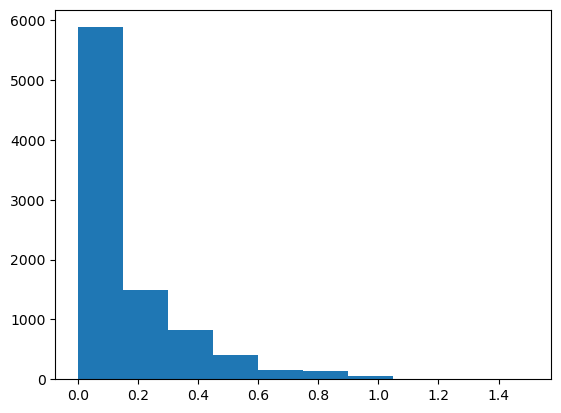

In [176]:
plt.hist(df['CASH_ADVANCE_FREQUENCY'])   #values should be between 0 and 1
plt.show()                               #right skewed

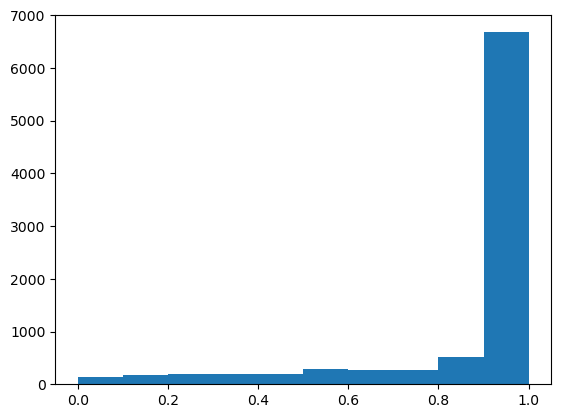

In [177]:
plt.hist(df['BALANCE_FREQUENCY'])  #left skewed
plt.show()

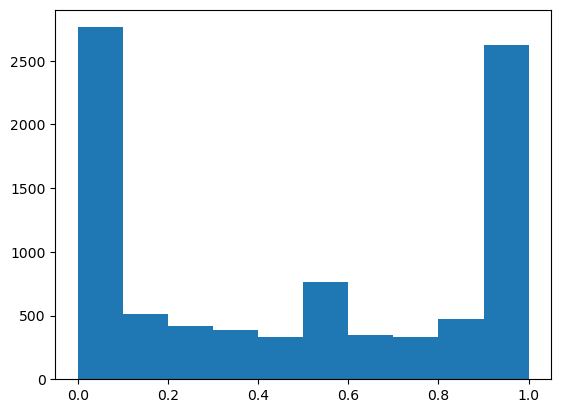

In [178]:
plt.hist(df['PURCHASES_FREQUENCY'])  #right skewed
plt.show()

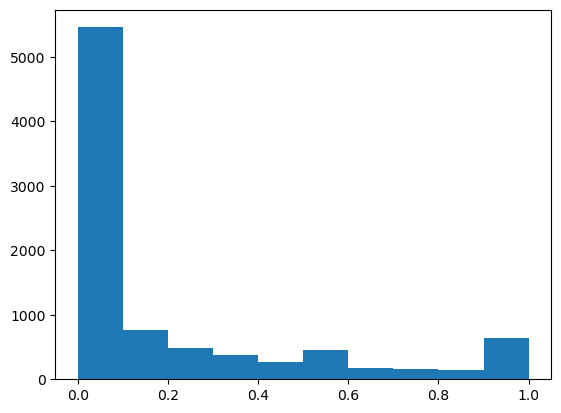

In [179]:
plt.hist(df['ONEOFF_PURCHASES_FREQUENCY'])   #right skewed
plt.show()

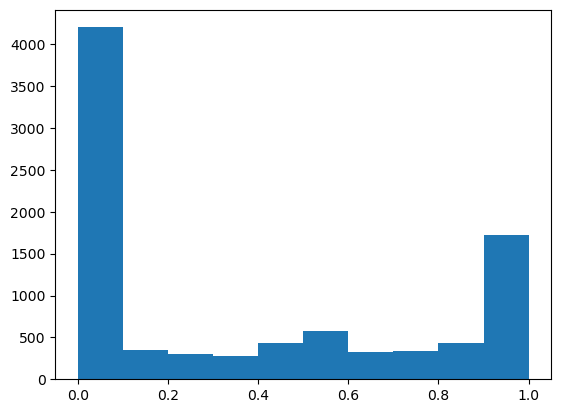

In [180]:
plt.hist(df['PURCHASES_INSTALLMENTS_FREQUENCY'])   #right skewed
plt.show()

In [181]:
df['CASH_ADVANCE_FREQUENCY'].max()

1.5

In [182]:
df.loc[df['CASH_ADVANCE_FREQUENCY']>1,'CASH_ADVANCE_FREQUENCY']

681     1.250000
1626    1.166667
2555    1.125000
2608    1.100000
3038    1.500000
3253    1.166667
8055    1.090909
8365    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [183]:
len(df.loc[df['CASH_ADVANCE_FREQUENCY']>1,'CASH_ADVANCE_FREQUENCY'])

8

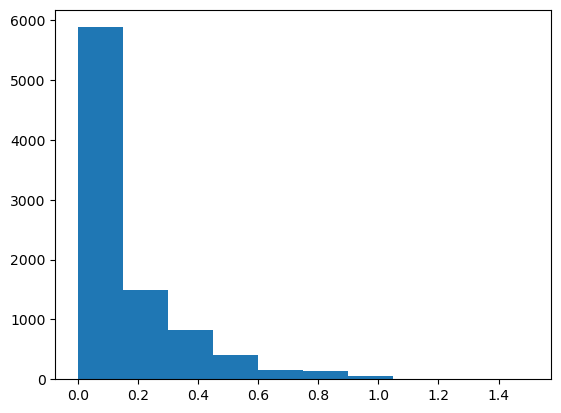

In [184]:
plt.hist(df['CASH_ADVANCE_FREQUENCY'])    #right skewed
plt.show()

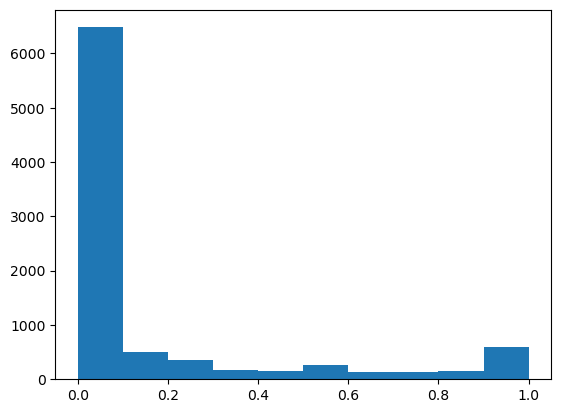

In [185]:
plt.hist(df['PRC_FULL_PAYMENT'])   #right skewed
plt.show()

In [186]:
df.loc[df['CASH_ADVANCE_FREQUENCY']>1,'CASH_ADVANCE_FREQUENCY']

681     1.250000
1626    1.166667
2555    1.125000
2608    1.100000
3038    1.500000
3253    1.166667
8055    1.090909
8365    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [187]:
len(df.loc[df['CASH_ADVANCE_FREQUENCY']>1,'CASH_ADVANCE_FREQUENCY'])   #outliers

8

In [188]:
duplicates = df.duplicated(subset = ['CUST_ID'], keep = False)   #no duplicates
df[duplicates]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [189]:
sum = df[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].sum(axis=1)   #inconsistencies?
eq = sum==df['PURCHASES']

In [190]:
df[~eq]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
50,C10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8
71,C10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12
82,C10086,3.786310,0.636364,133.05,28.20,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12
86,C10090,7069.950386,1.000000,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.000000,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12
110,C10115,156.216753,0.818182,1354.86,585.63,769.23,0.000000,0.916667,0.333333,0.833333,0.000000,0,34,5500.0,858.976682,108.319927,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8769,C19008,116.581583,0.818182,1045.14,227.14,818.00,0.000000,0.727273,0.181818,0.545455,0.000000,0,17,9000.0,1258.396242,144.115556,0.333333,11
8825,C19065,72.881984,1.000000,654.84,460.89,193.95,0.000000,1.000000,0.888889,0.888889,0.000000,0,17,1500.0,580.489782,130.035215,0.714286,9
8832,C19073,7.472600,0.333333,63.40,35.09,28.31,0.000000,0.222222,0.111111,0.111111,0.000000,0,2,500.0,83.417439,106.028116,0.000000,9
8834,C19075,191.376930,1.000000,510.00,0.00,780.00,0.000000,0.555556,0.000000,0.444444,0.000000,0,7,1000.0,459.174840,128.231992,0.000000,9


In [191]:
df[eq]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [192]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)    #MINIMUM_PAYMENTS, CREDIT_LIMIT has null values

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [193]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

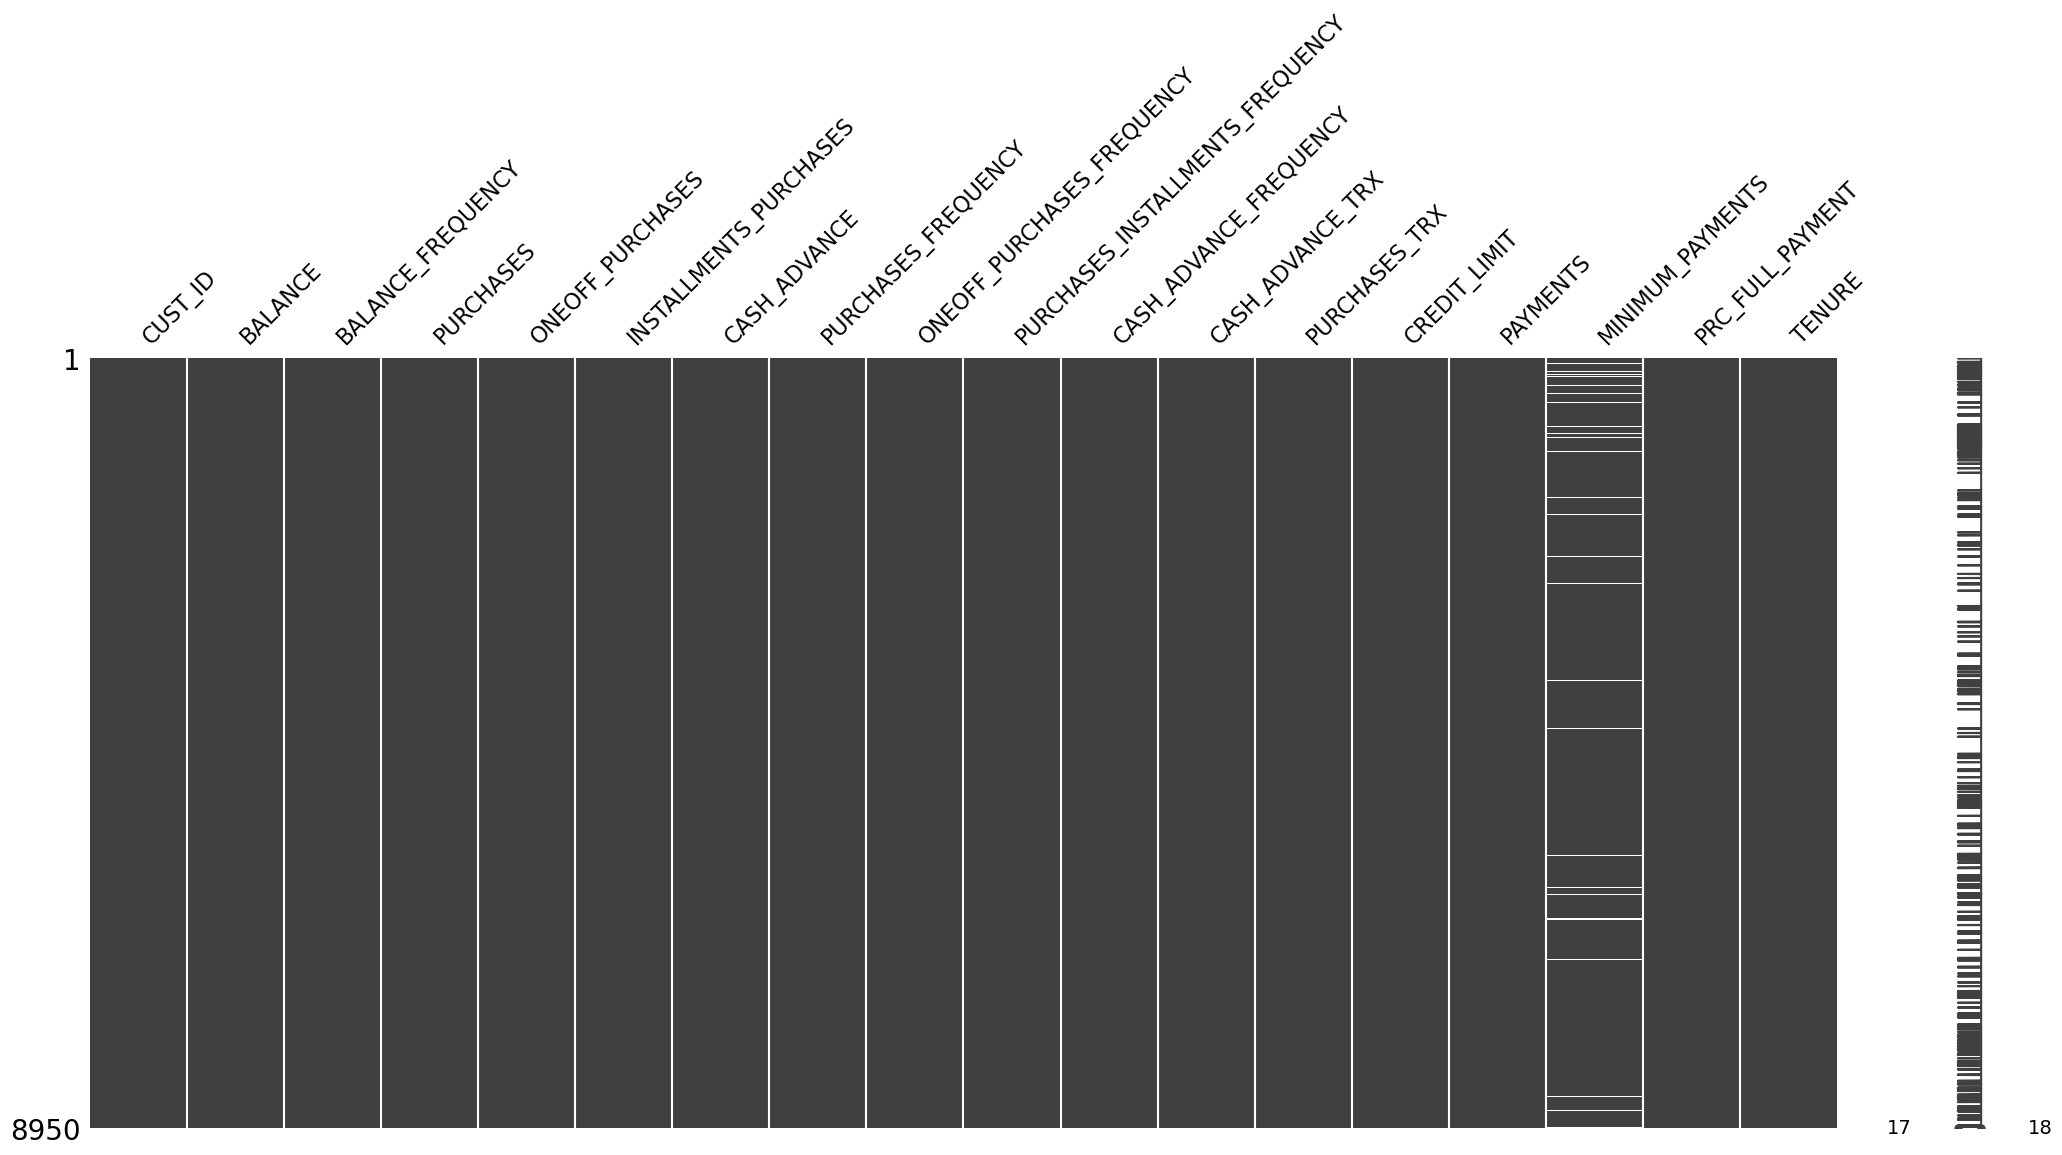

In [194]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(df)
plt.show()

In [195]:
missing = df[df['MINIMUM_PAYMENTS'].isna()]
complete = df[~df['MINIMUM_PAYMENTS'].isna()]

In [196]:
complete.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8637.000000,8636.000000,8637.000000,8637.000000,8637.000000,8637.00000
mean,1601.041632,0.894951,1025.315149,604.831402,420.794807,994.082050,0.495943,0.205885,0.368778,0.137608,3.313651,15.031492,4522.091030,1784.272537,864.206542,0.159285,11.53375
std,2095.519182,0.207833,2167.010602,1684.222861,917.203254,2121.353259,0.401285,0.300044,0.398090,0.201780,6.912151,25.179530,3659.240379,2909.704331,2372.446607,0.296259,1.31226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.00000
25%,147.838347,0.909091,43.300000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.446951,169.123707,0.000000,12.00000
50%,916.749476,1.000000,375.240000,44.990000,94.710000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.300688,312.343947,0.000000,12.00000
75%,2104.961701,1.000000,1145.850000,598.950000,484.040000,1131.986387,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.116757,825.485459,0.166667,12.00000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.00000


In [197]:
missing.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,0.0,313.0,313.000000
mean,555.441321,0.389403,393.087284,250.433387,142.653898,559.136698,0.336043,0.107886,0.244670,0.067169,1.460064,5.833866,3731.789137,322.286168,NaN,0.0,11.063898
std,1292.687887,0.408341,757.905701,624.453991,311.289043,1185.132567,0.372517,0.227370,0.359756,0.130087,3.182359,9.600908,2924.606153,1996.658905,NaN,0.0,1.869734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,NaN,0.0,6.000000
25%,0.187069,0.090909,1.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,0.000000,NaN,0.0,12.000000
50%,16.848358,0.181818,130.400000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,0.000000,NaN,0.0,12.000000
75%,286.686616,1.000000,399.950000,176.030000,152.280000,480.104401,0.583333,0.083333,0.416667,0.083333,1.000000,8.000000,5000.000000,0.000000,NaN,0.0,12.000000
max,9164.724752,1.000000,7597.090000,6761.290000,2959.240000,7616.064965,1.000000,1.000000,1.000000,1.000000,21.000000,77.000000,19500.000000,29272.486070,NaN,0.0,12.000000


In [198]:
missing

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [199]:
complete

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


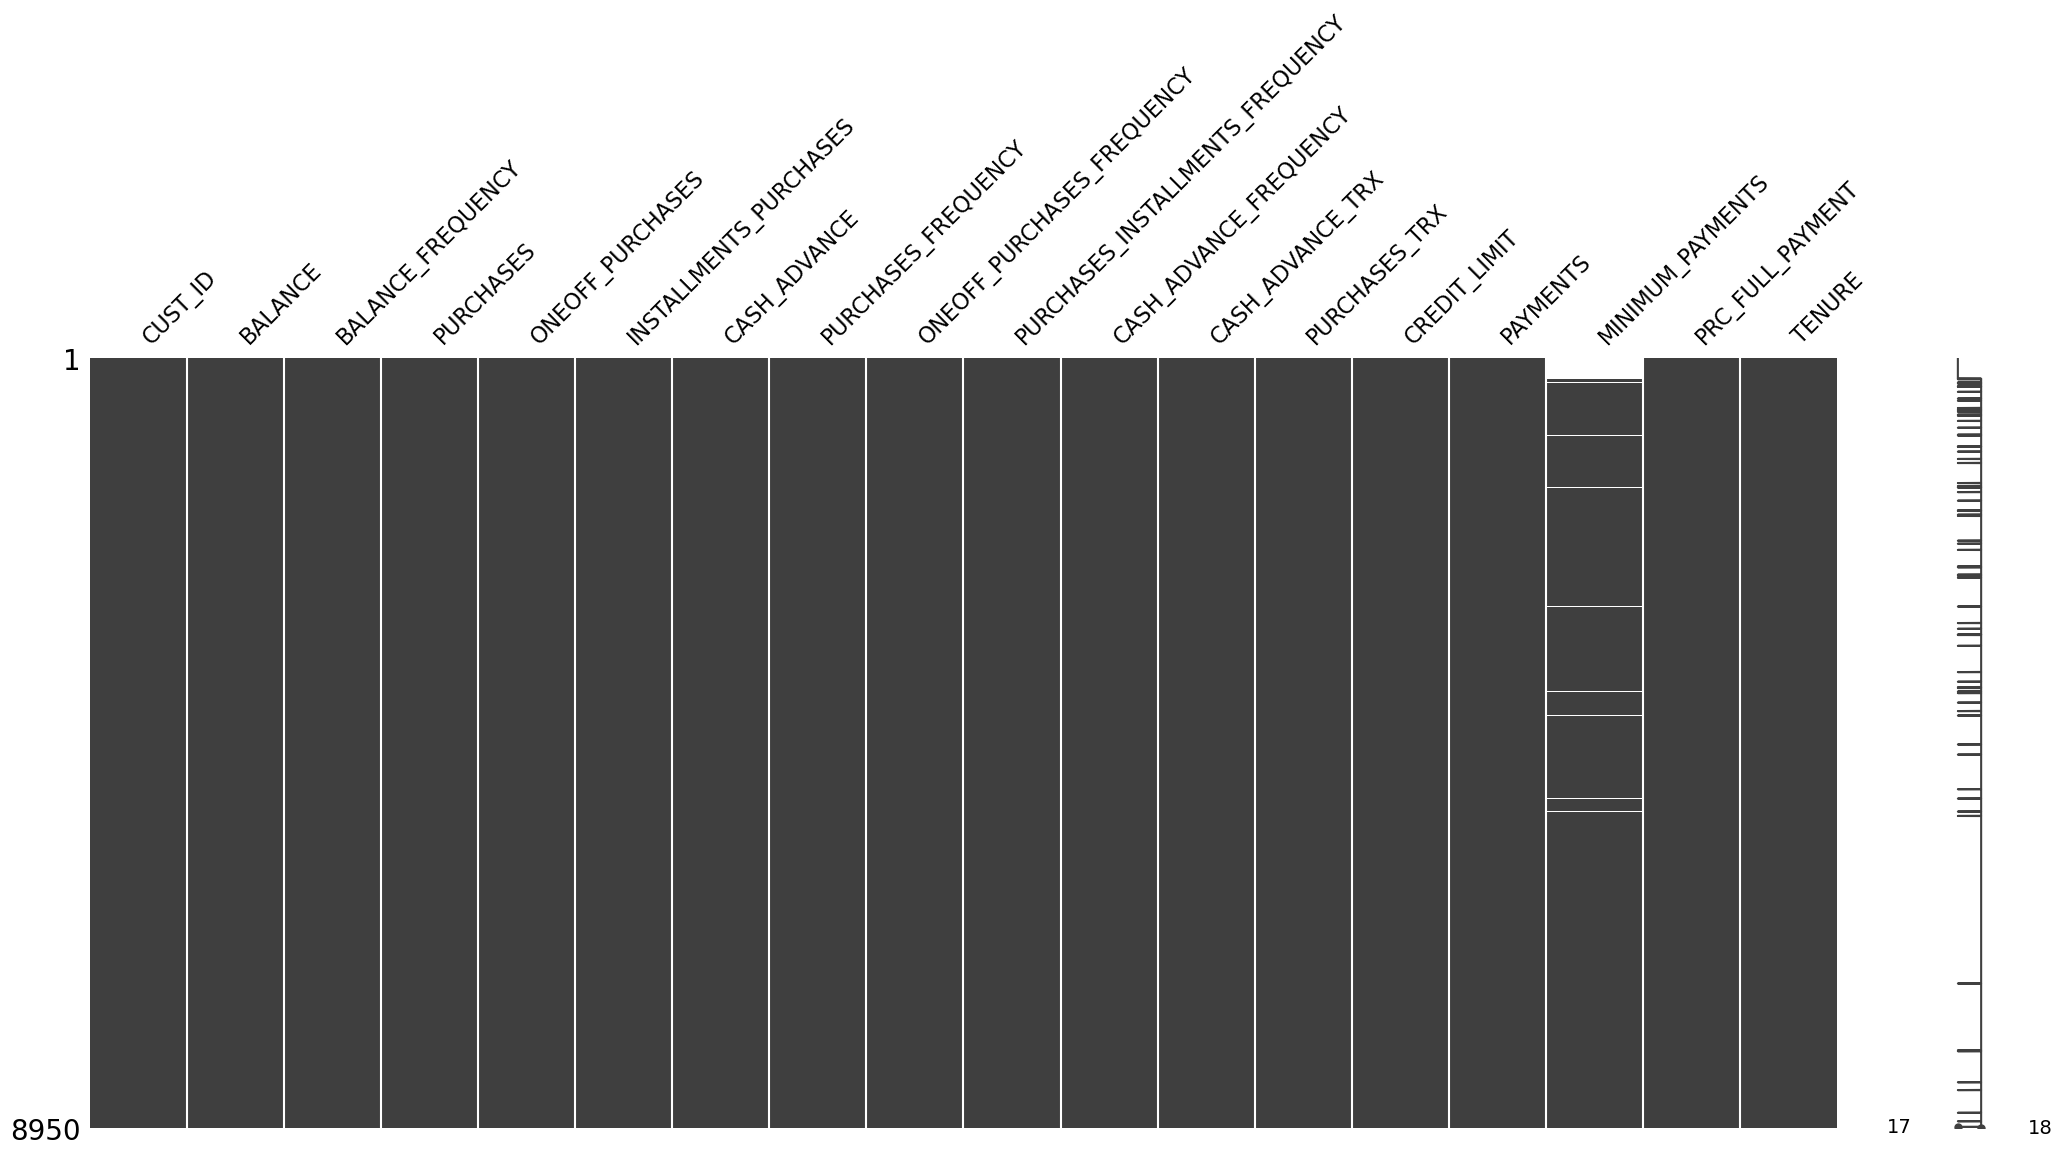

In [200]:
sorted_df = df.sort_values(by = 'PAYMENTS')   #most of them has zero payments 
msno.matrix(sorted_df)
plt.show()

In [201]:
sorted_df.loc[(sorted_df['MINIMUM_PAYMENTS'].isnull()) & (sorted_df['PAYMENTS'] == 0)]  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3070,C13159,0.000000,0.000000,63.30,0.00,63.30,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,2700.0,0.0,NaN,0.0,12
6506,C16684,3.647117,0.100000,0.00,0.00,0.00,58.174402,0.000000,0.000000,0.000000,0.100000,2,0,1200.0,0.0,NaN,0.0,10
8480,C18710,0.391963,0.090909,43.33,0.00,43.33,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1200.0,0.0,NaN,0.0,12
976,C11010,887.679317,1.000000,1486.31,179.75,1306.56,0.000000,1.000000,0.833333,0.916667,0.000000,0,39,1800.0,0.0,NaN,0.0,12
4629,C14755,0.000000,0.000000,19.25,0.00,19.25,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,0.0,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,C16094,0.000000,0.000000,9.28,0.00,9.28,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,5000.0,0.0,NaN,0.0,12
8803,C19043,677.466332,1.000000,283.30,0.00,283.30,668.675103,1.000000,0.000000,0.900000,0.100000,4,10,1000.0,0.0,NaN,0.0,10
1015,C11050,1548.767290,1.000000,723.65,723.65,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,24,8500.0,0.0,NaN,0.0,12
573,C10597,11.890862,0.090909,165.00,165.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,15000.0,0.0,NaN,0.0,12


In [202]:
df.loc[df['MINIMUM_PAYMENTS']>df['PAYMENTS']]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.00,12
15,C10016,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,C19174,735.652303,1.000000,619.60,255.62,363.98,546.902403,1.000000,0.166667,0.833333,0.166667,5,16,1000.0,106.138603,337.294767,0.00,6
8939,C19180,728.352548,1.000000,734.40,734.40,0.00,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- CASH_ADVANCE_FREQUENCY.max()>1         <br>
2- MINIMUM_PAYMENTS, CREDIT_LIMIT has null values  <br>
3- skewed data

In [21]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [5]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [6]:
#solution: set any value greater than 1 to 1
df.loc[df['CASH_ADVANCE_FREQUENCY'] > 1, 'CASH_ADVANCE_FREQUENCY'] = 1

In [7]:
#test 
assert df['CASH_ADVANCE_FREQUENCY'].max() == 1

**Second issue**

In [8]:
#solution
median_minimum_payments = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_minimum_payments, inplace=True)

In [9]:
#test
assert df['MINIMUM_PAYMENTS'].isnull().sum() == 0

In [10]:
median_CREDIT_LIMIT = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_CREDIT_LIMIT, inplace=True)

In [11]:
#test
assert df['CREDIT_LIMIT'].isnull().sum() == 0

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## third issue

In [13]:
right_skewed_columns = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_TRX']

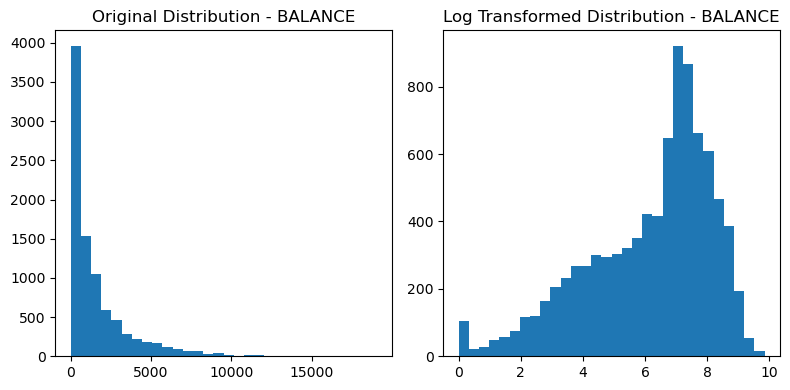

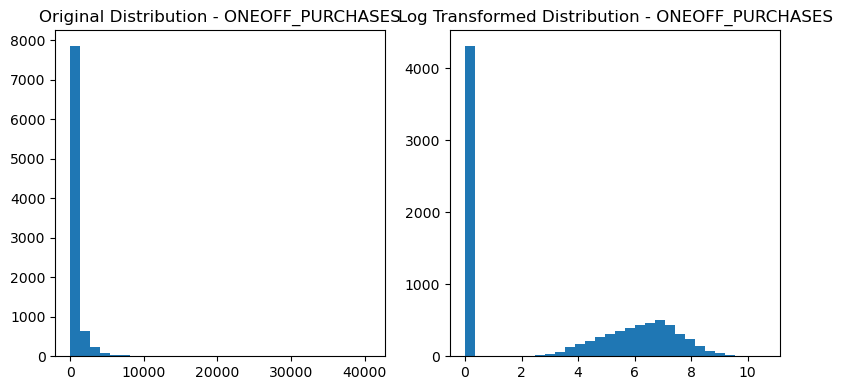

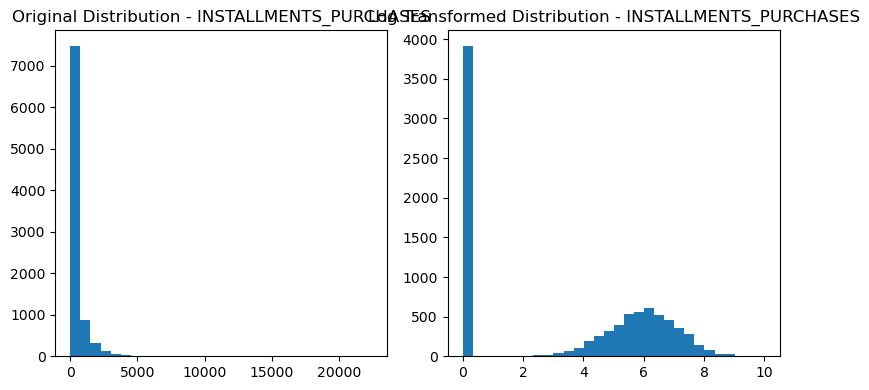

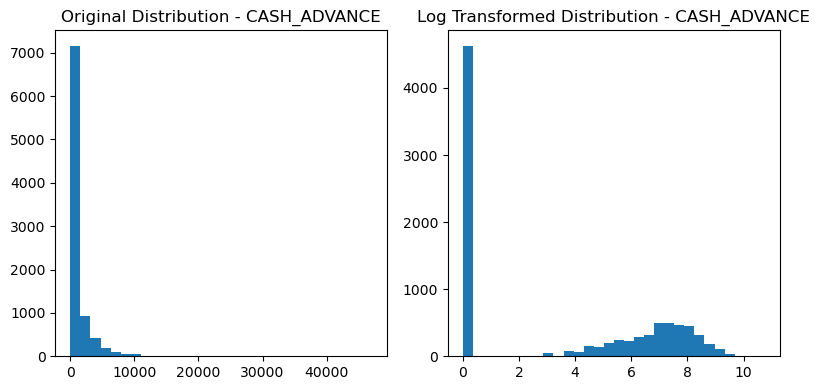

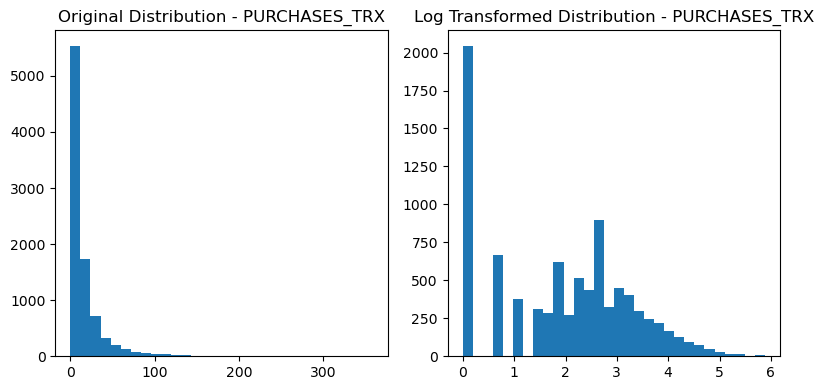

In [230]:
# Log transformation
df[right_skewed_columns] = np.log1p(df[right_skewed_columns])

# Visualize the changes
for column in right_skewed_columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_copy[column], bins=30)
    plt.title(f'Original Distribution - {column}')

    plt.subplot(1, 2, 2)
    plt.hist((df[column]), bins=30)
    plt.title(f'Log Transformed Distribution - {column}')

    plt.tight_layout()
    plt.show()

In [231]:
df_copy.iloc[:, 1:].skew()  #before transformation

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [232]:
df.iloc[:, 1:].skew() #after transformation

BALANCE                             -0.861021
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                     0.185854
INSTALLMENTS_PURCHASES              -0.024981
CASH_ADVANCE                         0.262594
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.788607
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        0.032697
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [253]:
df = df_copy.copy()

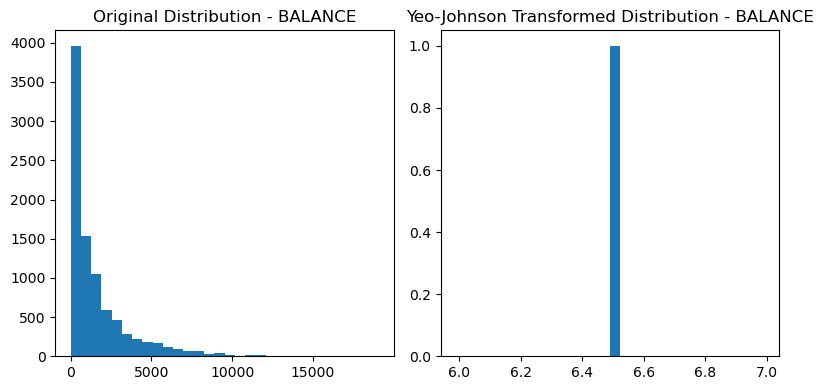

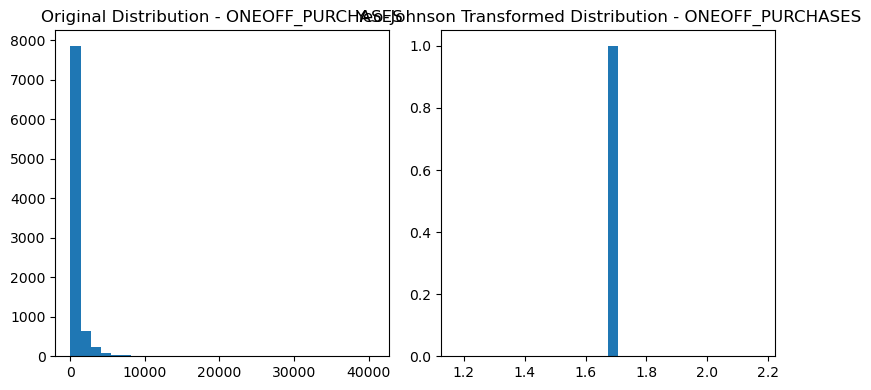

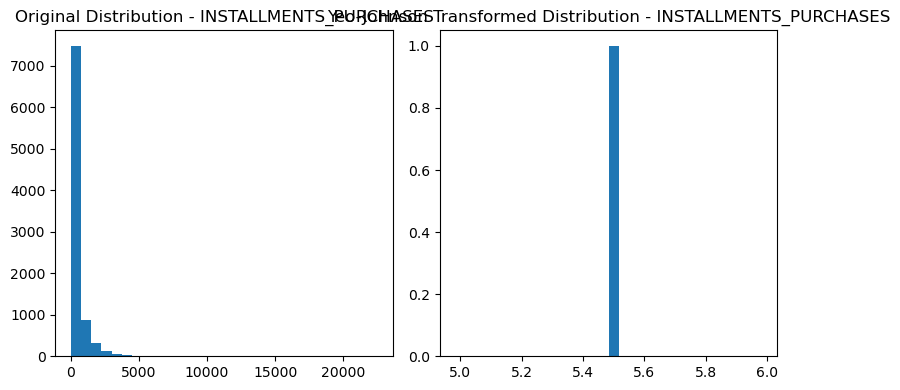

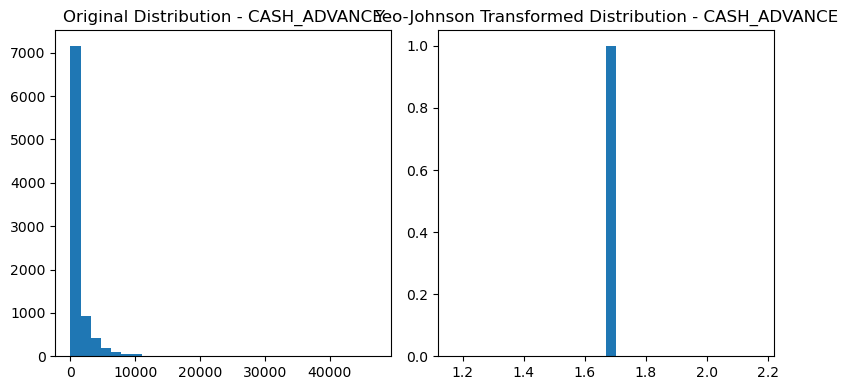

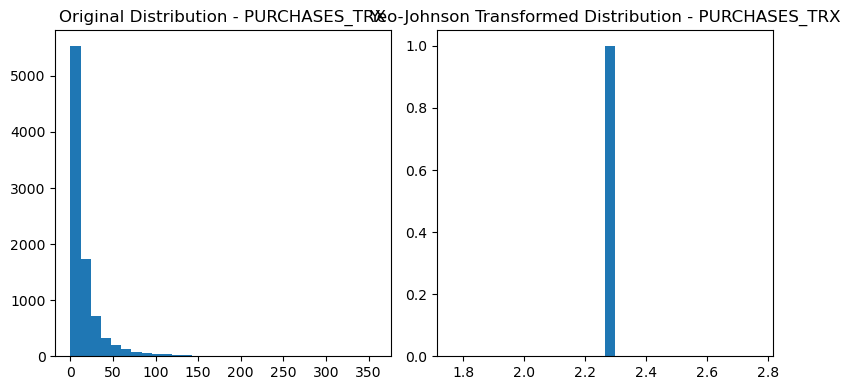

In [251]:
from scipy.stats import yeojohnson
for column in right_skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_copy[column], bins=30)
    plt.title(f'Original Distribution - {column}')

    plt.subplot(1, 2, 2)
    plt.hist((df[column] + 1)[0], bins=30)
    plt.title(f'Yeo-Johnson Transformed Distribution - {column}')

    plt.tight_layout()
    plt.show()

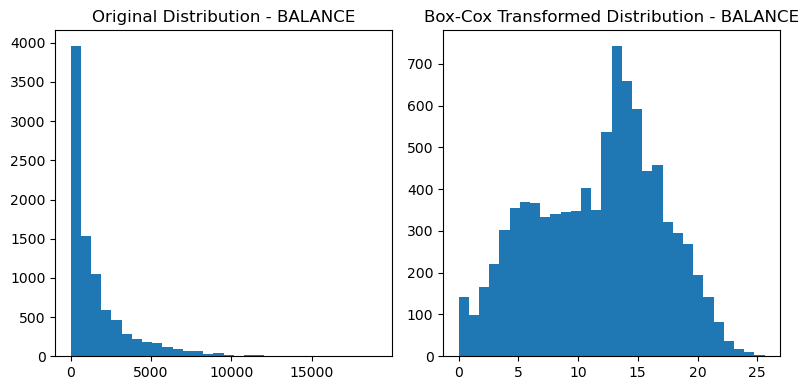

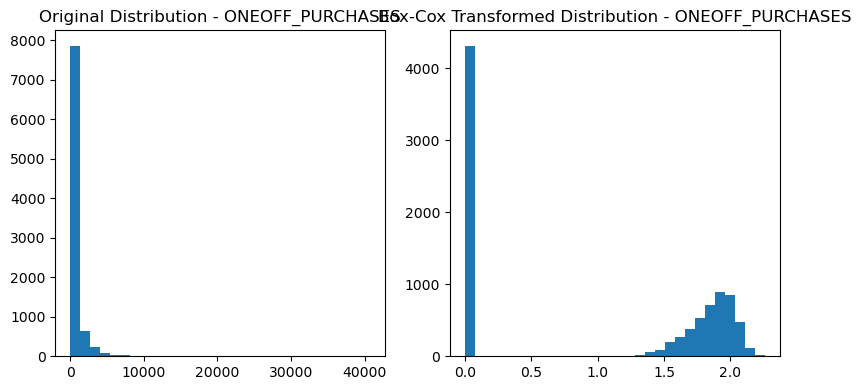

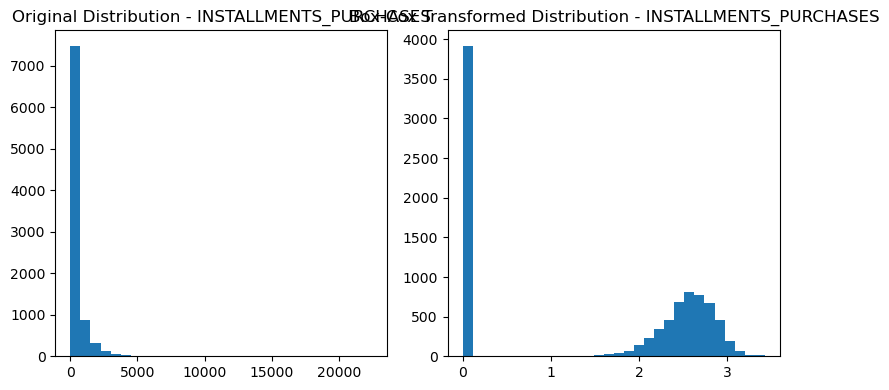

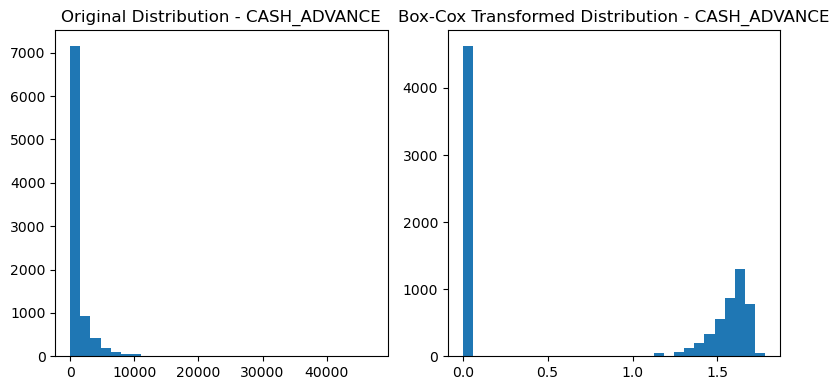

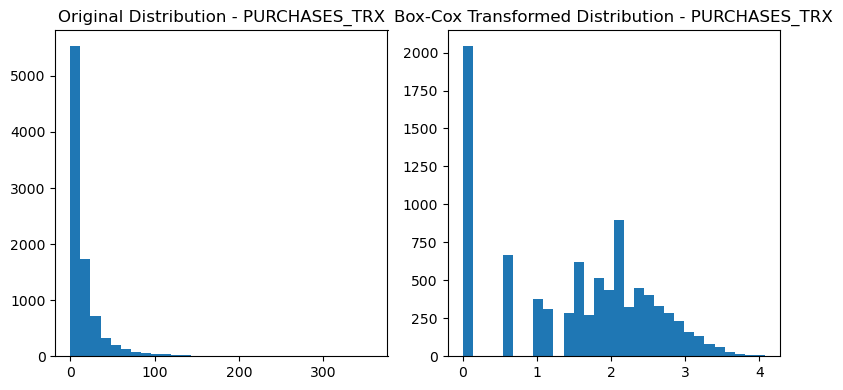

In [14]:
from scipy.stats import boxcox

# Box-Cox transformation
for column in right_skewed_columns:
    df[column], _ = boxcox(df[column] + 1)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_copy[column], bins=30)
    plt.title(f'Original Distribution - {column}')

    plt.subplot(1, 2, 2)
    plt.hist(boxcox(df[column] + 1)[0], bins=30)
    plt.title(f'Box-Cox Transformed Distribution - {column}')

    plt.tight_layout()
    plt.show()

In [15]:
df.iloc[:, 1:].skew()

BALANCE                             -0.119428
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                     0.115147
INSTALLMENTS_PURCHASES              -0.014843
CASH_ADVANCE                         0.188413
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.788607
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        0.006058
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [16]:
# Extracting left-skewed columns
left_skewed_columns = ['BALANCE_FREQUENCY', 'TENURE']

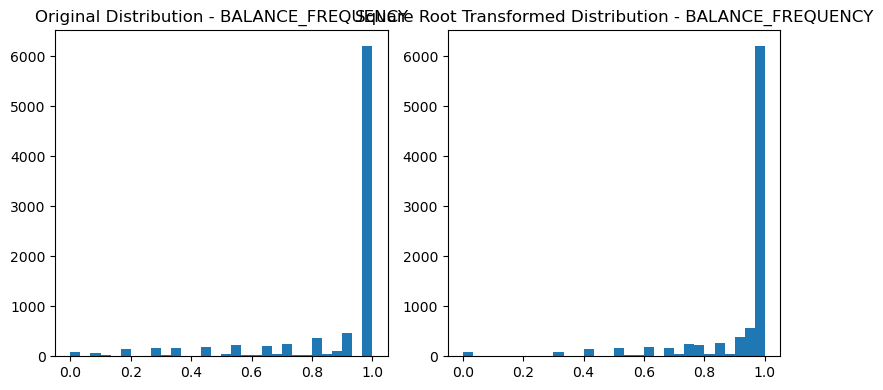

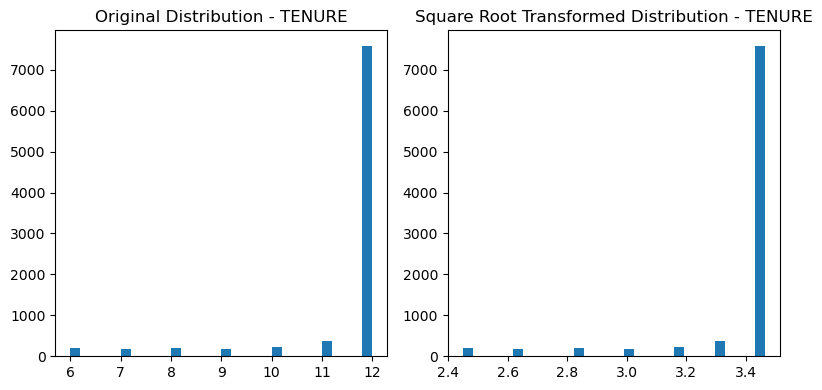

In [17]:
# Square root transformation
for column in left_skewed_columns:
    df[column] = np.sqrt(df[column])

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.hist(df_copy[column], bins=30)
    plt.title(f'Original Distribution - {column}')

    plt.subplot(1, 2, 2)
    plt.hist((df[column]), bins=30)
    plt.title(f'Square Root Transformed Distribution - {column}')

    plt.tight_layout()
    plt.show()

In [18]:
df.iloc[:, 1:].skew()

BALANCE                             -0.119428
BALANCE_FREQUENCY                   -2.819495
PURCHASES                            8.144269
ONEOFF_PURCHASES                     0.115147
INSTALLMENTS_PURCHASES              -0.014843
CASH_ADVANCE                         0.188413
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.788607
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        0.006058
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -3.064332
dtype: float64

In [19]:
df_copy.iloc[:, 1:].skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [262]:
from sklearn import preprocessing

In [20]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001 -1.238103          -0.097126  -0.424900         -1.000488   
1  C10002  1.051961           0.190539  -0.469552         -1.000488   
2  C10003  0.860616           0.464146  -0.107668          1.065381   
3  C10004  0.570542          -0.725092   0.232058          1.229556   
4  C10005  0.111925           0.464146  -0.462063         -0.019902   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.383704     -0.944538            -0.806490   
1               -1.085422      1.399909            -1.221758   
2               -1.085422     -0.944538             1.269843   
3               -1.085422      0.680451            -1.014125   
4               -1.085422     -0.944538            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

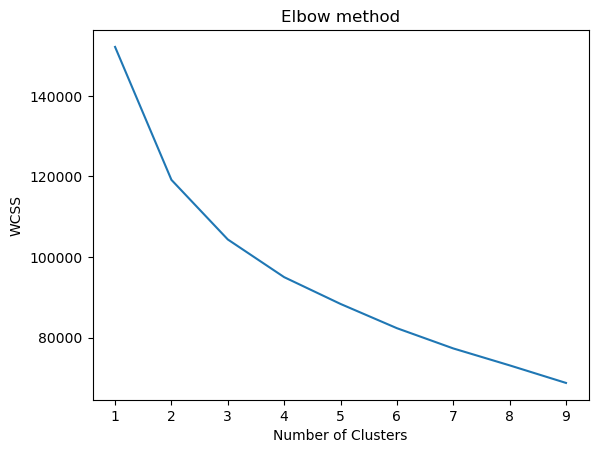

In [22]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

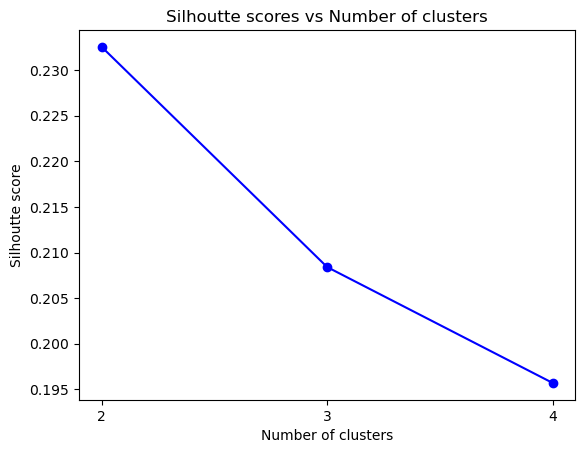

In [23]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(df, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [25]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(df)

print('Silhoutte score of our model is ' + str(silhouette_score(df, kmeans.labels_)))

Silhoutte score of our model is 0.19569844103407477


## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=... , method=...,metric=...),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering





## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 